<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# Model evaluation - Precision Case

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
  - **1.1** [**Need for Model Evaluation.**](#Section11)
  - **1.2** [**What is Precision Score?**](#Section12)
  - **1.3** [**Concept Behind Precision Score**](#Section13)

**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Information**](#Section41)
  - **4.2** [**Data Statistics**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)

**6.** [**Data Preparation**](#Section6)<br>

**7.** [**Model Development and Evaluation.**](#Section7)<br>
  - **7.1** [**Random Forest Baseline Model**](#Section71)<br>
  - **7.2** [**Using Trained Model for Prediction**](#Section72)<br>
  - **7.3** [**Random Forest Baseline Model Evaluation**](#Section73)<br>
  - **7.4** [**Random Forest with RandomizedSearchCV**](#Section74)<br>
  - **7.5** [**Random Forest with RandomSearchCV Model Evaluation**](#Section75)<br>
  
**8.** [**Conclusion**](#Section8)<br>



---
<a name = Section1></a>
# **1. Introduction**
---

- **Model Evaluation** is an **integral part of the model development process**.

- It **helps to find** **the best model that represents our data** and how well the chosen model will work in the future. 

- Evaluating model performance with the data used for training should not be used in data science because the model has already learned the features passed for training and when evaluated on the same data it will pass overfitted result.

<a name = Section11></a>
### **1.1 Need for Model Evaluation.**

- Model Evaluation **plays an important role** in the whole process.

- The performance of a model is **calculated by choosing the right metrics**.

- The **right metrics** are generally **specific to the use case**.

- It also helps us choose the right model.

<a name = Section12></a>
### **1.2 What is Precision Score?**

 Precision is the **the proportion of positive cases that were correctly identified**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/precision.jpg" width="480" height="100" /></center></br>

Precision is defined as **the number of true positives divided by the number of true positives plus the number of false positives**.

<a name = Section13></a>
### **1.3 Concept Behind Precision Score**

- As we know, **Precision gives the proportion of positive cases that were correctly identified**.

- Let us understand it with the **confusion matrix**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/confusion%20total%20matrix.png" width="480" height="240" /></center>

- In the above diagram,
 
  - **True Positives (TP) -**
 
    - These are the **correctly predicted positive values** which means that the value of **actual class is yes** and the value of **predicted class is also yes**.
  
  - **True Negatives (TN) -** 
  
     - These are the **correctly predicted negative values** which means that the value of **actual class is no** and value of **predicted class is also no**.

  - **False Positives (FP) –**
     - When **actual class is no** and **predicted class is yes**. 

  - **False Negatives (FN) –**
     - When **actual class is yes** but **predicted class in no**.  



---
<a name = Section1></a>
# **2. Problem Statement**
---
- Courts are based on the principle that says "__it is better 100 guilty Persons should escape than that one innocent Person should suffer__". 

- Given the dataset containing __personal details of citizens__.

- A few of them have been arrested for various small and large crimes in the past.

- Make a model to predict whether people will commit crime in future or not using random forest algorithm.  

 

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/crime.jpg" width="500" height="300" /></center>




- Evaluate the model using possible __model evaluation techniques__. 

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
# !pip install -q datascience                   # Package that is required by pandas profiling
# !pip install -q pandas-profiling              # Library to generate basic statistics about data

     |████████████████████████████████| 71kB 1.9MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
# !pip install -q --upgrade pandas-profiling

     |████████████████████████████████| 266kB 2.6MB/s 
     |████████████████████████████████| 71kB 5.8MB/s 
     |████████████████████████████████| 71kB 5.4MB/s 
     |████████████████████████████████| 71kB 5.3MB/s 
     |████████████████████████████████| 3.1MB 8.9MB/s 
     |████████████████████████████████| 604kB 44.4MB/s 
     |████████████████████████████████| 296kB 31.5MB/s 


<a name = Section33></a>
### **3.3 Importing Libraries**

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # for initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
from IPython import get_ipython

get_ipython().run_line_magic('matplotlib', 'inline')
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

d:\MY-DSMLAI\ML\Model Evaluation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---


- The dataset consists of __45718 rows__.<br/>
Below is a table having brief description of features present in the dataset.



|Feature    |	Description                                               |
|-----------| ------------                                                | 
|PERID	    |        Person ID                                            |
| IFATHER   | 	FATHER IN HOUSEHOLD                                       |
| NRCH17_2  | 	RECODED # R's CHILDREN &lt; 18 IN HOUSEHOLD               |
| RHHSIZ2	| RECODE - IMPUTATION-REVISED # PERSONS IN HH                 |
| IIHHSIZ2	| IMPUTATION INDICATOR                                        |
| IRKI17_2	| IMPUTATION-REVISED # KIDS AGED&lt;18 IN HH                  |   
| IIKI17_2  |  IRKI17_2-IMPUTATION INDICATOR                              | 
| IRHH65_2  | 	REC - IMPUTATION-REVISED # OF PER IN HH AGED&gt;=65       |
| IIHH65_2  | 	IRHH65_2-IMPUTATION INDICATOR                             |
| PRXRETRY	| SELECTED PROXY UNAVAILABLE, OTHER PROXY AVAILABLE?          | 
| PRXYDATA	| IS PROXY ANSWERING INSURANCE/INCOME QS                      |
| MEDICARE	| COVERED BY MEDICARE                                         |
| CAIDCHIP	| COVERED BY MEDICAID/CHIP                                    |
| CHAMPUS	| COV BY TRICARE, CHAMPUS, CHAMPVA, VA, MILITARY              |
| PRVHLTIN	| COVERED BY PRIVATE INSURANCE                                |
| GRPHLTIN	| PRIVATE PLAN OFFERED THROUGH EMPLOYER OR UNION              |
| HLTINNOS	| COVERED BY HEALTH INSUR                                     |
| HLCNOTYR  | ANYTIME DID NOT HAVE HEALTH INS/COVER PAST 12 MOS           |
| HLCNOTMO  | 	PAST 12 MOS, HOW MANY MOS W/O COVERAGE                    |
| HLCLAST	| TIME SINCE LAST HAD HEALTH CARE COVERAGE                    |
| HLLOSRSN	| MAIN REASON STOPPED COVERED BY HEALTH INSURANCE             |
| HLNVCOST  | 	COST TOO HIGH                                             |
| HLNVOFFR	| EMPLOYER DOESN'T OFFER                                      |
| HLNVREF	| INSURANCE COMPANY REFUSED COVERAGE                          |
| HLNVNEED  | 	DON'T NEED IT                                             |
| HLNVSOR   | 	NEVER HAD HLTH INS SOME OTHER REASON                      |
| IRMCDCHP  | 	IMPUTATION REVISED CAIDCHIP                               |
| IIMCDCHP	| MEDICAID/CHIP - IMPUTATION INDICATOR                        |
| IRMEDICR	| MEDICARE - IMPUTATION REVISED                               |
| IIMEDICR	| MEDICARE - IMPUTATION INDICATOR                             |
| IRCHMPUS	| CHAMPUS - IMPUTATION REVISED                                |
| IICHMPUS	| CHAMPUS - IMPUTATION INDICATOR                              |
| IRPRVHLT	| PRIVATE HEALTH INSURANCE - IMPUTATION REVISED               |
| IIPRVHLT	| PRIVATE HEALTH INSURANCE - IMPUTATION INDICATOR             |
| IROTHHLT	| OTHER HEALTH INSURANCE - IMPUTATION REVISED                 |
| IIOTHHLT	| OTHER HEALTH INSURANCE - IMPUTATION INDICATOR               |
| HLCALLFG	| FLAG IF EVERY FORM OF HEALTH INS REPORTED                   |
| HLCALL99	| YES TO MEDICARE/MEDICAID/CHAMPUS/PRVHLTIN                   |
| ANYHLTI2	| COVERED BY ANY HEALTH INSURANCE - RECODE                    |
| IRINSUR4	| RC-OVERALL HEALTH INSURANCE - IMPUTATION REVISED            |
| IIINSUR4	| RC-OVERALL HEALTH INSURANCE - IMPUTATION INDICATOR          |
| OTHINS	| RC-OTHER HEALTH INSURANCE                                   |
| CELLNOTCL	| NOT A CELL PHONE                                            |
| CELLWRKNG | WORKING CELL PHONE                                          |
| IRFAMSOC	| FAM RECEIVE SS OR RR PAYMENTS - IMPUTATION REVISED          |
| IIFAMSOC	| FAM RECEIVE SS OR RR PAYMENTS - IMPUTATION INDICATOR        |
| IRFAMSSI	| FAM RECEIVE SSI - IMPUTATION REVISED                        |
| IIFAMSSI	| FAM RECEIVE SSI - IMPUTATION INDICATOR                      |
| IRFSTAMP	| RESP/OTH FAM MEM REC FOOD STAMPS - IMPUTATION REVISED       |
| IIFSTAMP	| RESP/OTH FAM MEM REC FOOD STAMPS - IMPUTATION INDICATOR     |
| IRFAMPMT	| FAM RECEIVE PUBLIC ASSIST - IMPUTATION REVISED              |
| IIFAMPMT	| FAM RECEIVE PUBLIC ASSIST - IMPUTATION INDICATOR            |
| IRFAMSVC	| FAM REC WELFARE/JOB PL/CHILDCARE - IMPUTATION REVISED       |
| IIFAMSVC	| FAM REC WELFARE/JOB PL/CHILDCARE - IMPUTATION INDICATOR     |
| IRWELMOS	| IMP. REVISED - NO.OF MONTHS ON WELFARE                      |
| IIWELMOS	| NO OF MONTHS ON WELFARE - IMPUTATION INDICATOR              |
| IRPINC3	| RESP TOT INCOME (FINER CAT) - IMP REV                       |
| IRFAMIN3  | RECODE - IMP.REVISED - TOT FAM INCOME                       |
| IIPINC3	| RESP TOT INCOME (FINER CAT) - IMP INDIC                     |
| IIFAMIN3	| IRFAMIN3 - IMPUTATION INDICATOR                             |
| GOVTPROG  | RC-PARTICIPATED IN ONE OR MORE GOVT ASSIST PROGRAMS         |
| POVERTY3	| RC-POVERTY LEVEL                                            |
| TOOLONG	| RESP SAID INTERVIEW WAS TOO LONG                            |
| TROUBUND	| DID RESP HAVE TROUBLE UNDERSTANDING INTERVIEW               |
| PDEN10	| POPULATION DENSITY 2010                                     |
| COUTYP2	| COUNTY METRO/NONMETRO STATUS                                |
| MAIIN102	| MAJORITY AMER INDIAN AREA INDICATOR FOR SEGMENT             |
| AIIND102	| AMER INDIAN AREA INDICATOR                                  |
| ANALWT_C	| FIN PRSN-LEVEL SIMPLE WGHT                                  |
| VESTR    	| ANALYSIS STRATUM                                            |
| VEREP	    | ANALYSIS REPLICATE                                          |
| Criminal	| Target Variable                                             |

In [3]:
crime = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/criminal_train.csv')
crime.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,4,1,1,1,2,1,2,1,1,2,2,3884.80600,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,1,1,1,1,1,2,2,2,3,2,2,1627.10811,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,1,1,2,1,1,1,2,1,2,1,99,9,2,2,1,1,1,1,2,2,2,3,2,2,4344.95798,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,7,7,1,1,2,3,2,2,1,1,2,2,792.52193,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,1,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,2,2,2,2,2,2,1518.11853,40001,2,0


<a name = Section41></a>
### **4.1 Data Information**

- In this section we will see the **information about the types of features**.

In [4]:
print("Shape of our Data is :", crime.shape)
print("Number of Rows are :",crime.shape[0])
print("Number of Columns are :",crime.shape[1])

Shape of our Data is : (45718, 72)
Number of Rows are : 45718
Number of Columns are : 72


In [6]:
crime.info(verbose = True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45718 entries, 0 to 45717
Data columns (total 72 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PERID      45718 non-null  int64  
 1   IFATHER    45718 non-null  int64  
 2   NRCH17_2   45718 non-null  int64  
 3   IRHHSIZ2   45718 non-null  int64  
 4   IIHHSIZ2   45718 non-null  int64  
 5   IRKI17_2   45718 non-null  int64  
 6   IIKI17_2   45718 non-null  int64  
 7   IRHH65_2   45718 non-null  int64  
 8   IIHH65_2   45718 non-null  int64  
 9   PRXRETRY   45718 non-null  int64  
 10  PRXYDATA   45718 non-null  int64  
 11  MEDICARE   45718 non-null  int64  
 12  CAIDCHIP   45718 non-null  int64  
 13  CHAMPUS    45718 non-null  int64  
 14  PRVHLTIN   45718 non-null  int64  
 15  GRPHLTIN   45718 non-null  int64  
 16  HLTINNOS   45718 non-null  int64  
 17  HLCNOTYR   45718 non-null  int64  
 18  HLCNOTMO   45718 non-null  int64  
 19  HLCLAST    45718 non-null  int64  
 20  HLLOSR

**Observations:**

- There are **no null values present**.

- **Each feature** seems to have **correct data type**.

<a name = Section42></a>
### **4.2 Data Statistics**

- In this section we will get **information about the data** and see some observations.

In [7]:
crime.describe()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
count,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000,45718.00000
mean,54454463.79260,3.35555,0.47649,3.42637,1.00171,2.08412,1.00744,1.16261,1.01102,97.39494,70.87410,2.37145,2.65208,2.22448,2.04320,39.55208,86.07395,12.84781,92.27289,89.32335,91.31819,97.10243,97.13688,97.14880,97.13207,97.13721,1.77247,1.01907,1.91673,1.00971,1.96179,1.00556,1.38746,1.01400,85.76016,7.88105,97.97657,97.97657,1.97150,1.10392,1.01846,1.85505,1.74117,1.14482,1.83794,1.01877,1.93160,1.01890,1.80003,1.00993,1.97321,1.01479,1.96384,1.01124,94.12689,8.52474,2.58465,4.75047,1.06142,1.19402,1.76268,2.33814,2.21941,2.23494,1.64614,1.76467,1.97894,1.97874,4692.66118,40023.73912,1.49385,0.06945
std,25539107.56901,1.17665,0.88847,1.42742,0.06131,1.10299,0.12316,0.46903,0.14644,12.35516,44.32568,6.48992,8.94829,4.94478,7.80935,47.78638,33.00842,30.64631,24.25711,28.85306,25.80548,13.29394,13.04907,12.96324,13.08355,13.04672,0.41955,0.19528,0.27677,0.14028,0.19239,0.10692,0.48745,0.16779,33.34899,2.75487,1.51013,1.51013,8.98880,0.30559,0.19218,0.35243,4.07144,3.42148,0.36886,0.19373,0.25295,0.19440,0.40031,0.14182,0.16230,0.17235,0.18738,0.15070,20.47277,1.85901,1.98580,2.10673,0.34557,0.59224,0.42576,0.84973,5.29578,5.29365,0.61840,0.77141,0.14451,0.14516,5724.65949,265.14043,0.50023,0.25422
min,10002216.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.00000
25%,32331888.50000,4.00000,0.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,99.00000,1.00000,2.00000,2.00000,2.00000,1.00000,1.00000,99.00000,2.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,2.00000,1.00000,2.00000,1.00000,2.00000,1.00000,1.00000,1.00000,99.00000,9.00000,98.00000,98.00000,1.00000,1.00000,1.00000,2.00000,1.00000,1.00000,2.00000,1.00000,2.00000,1.00000,2.00000,1.00000,2.00000,1.00000,2.00000,1.00000,99.00000,9.00000,1.00000,3.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,2.00000,2.00000,1252.39647,40013.00000,1.00000,0.00000
50%,54110427.0000

**Observations:**

- There were **max** 4 fathers in an household.

- Almost **every family** had a **child above 18**, max 3 children below 18 years were present in an household.

- **Every column** had a **minimum value of -1**, which does not makes sense.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre-Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [8]:
profile = ProfileReport(df = crime)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  6.86it/s]

Accomplished!


**Observation:**


- There **72 variables** with **0% missing data** present.

- There are **42 categorical variables** and **30 numerical variables**.

- **NRCH17_2** column is **highly right skewed**.

- **IIKI17_2** column is **highly correlated** to **IIHH65_2**

- For full details checkout the report.

<a name = Section6></a>

---
# **6. Data Preparation**
---

**Preparing x and y using pandas**

In [11]:
x = crime.drop('Criminal',axis = 1)
x.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,CELLNOTCL,CELLWRKNG,IRFAMSOC,IIFAMSOC,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IRFAMIN3,IIPINC3,IIFAMIN3,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,25095143,4,2,4,1,3,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,4,1,1,1,2,1,2,1,1,2,2,3884.80600,40026,1
1,13005143,4,1,3,1,2,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,1,1,2,1,2,1,99,9,1,1,1,1,1,1,2,2,2,3,2,2,1627.10811,40015,2
2,67415143,4,1,2,1,2,1,1,1,99,99,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,1,1,2,1,1,1,2,1,2,1,99,9,2,2,1,1,1,1,2,2,2,3,2,2,4344.95798,40024,1
3,70925143,4,0,2,1,1,1,1,1,99,99,2,2,2,1,1,99,2,99,99,99,99,99,99,99,99,2,1,2,1,2,1,1,1,99,9,98,98,1,1,1,2,1,1,2,1,2,1,2,1,2,1,2,1,99,9,7,7,1,1,2,3,2,2,1,1,2,2,792.52193,40027,1
4,75235143,1,0,6,1,4,1,1,1,99,1,2,1,2,2,99,99,2,99,99,99,99,99,99,99,99,1,1,2,1,2,1,2,1,99,9,98,98,1,1,1,2,2,1,2,1,2,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,2,2,2,2,2,2,1518.11853,40001,2


In [12]:
y = crime['Criminal']

**Spliting X and y into train and test dataset.**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

**Checking the shape of X and y of train dataset**

In [14]:
print(X_train.shape)
print(y_train.shape)

(34288, 71)
(34288,)


**Checking the shape of X and y of test dataset**

In [15]:
print(X_test.shape)
print(y_test.shape)

(11430, 71)
(11430,)


<a name = Section7></a>

---
# **7. Model Development & Evaluation**
---

- In this section we will **develop RandomForest using input features** and **tune** our **model if required**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purpose** we will **focus** on **Precision score**, Also we will check for **Accuracy**, **Recall**, **F1-Score**, **Roc-Auc-Curve** and **Precision-Recall Curve**.



<a name = Section71></a>

## **7.1 Random Forest - Baseline Model**

In [16]:
model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

<a name = Section72></a>

## **7.2 Using Trained Model for Prediction**

In [17]:
#predicting on test data
y_pred_test = model.predict(X_test)

<a name = Section73></a>

## **7.3 Random Forest Baseline Model Evaluation**

### Checking Accuracy

In [18]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.9487314085739282


### Checking Precision Score

In [19]:
precision_score(y_test,y_pred_test)

0.6719242902208202

### Checking Recall Score

In [20]:
recall_score(y_test,y_pred_test)

0.5298507462686567

### Checking F1-Score

- The F measure (F1 score or F score) is a **measure of a test’s accuracy** and is defined as **the weighted harmonic mean of the precision and recall of the test**.
- The F score can **provide a more realistic measure of a test’s performance** by **using both precision and recall**. 
- The F score is often **used in information retrieval** for measuring search, **document classification**, and **query classification performance**.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/f1.jpg" width="300" height="240" /></center>


In [21]:
f1_score(y_test,y_pred_test)

0.5924895688456189

### Checking ROC-AUC Curve and Precision-Recall Curve

- ROC curve should not be used for **imbalanced data** as that can **interpret wrong result**. *If the model is performing good on the imbalanced data we should use precision-recall curve*.

- Because the **False Positive Rate ( False Positives / False Positives + True Negatives )** does **not drop drastically when the Total Real Negatives is huge**. 

- Whereas **Precision ( True Positives / (True Positives + False Positives) )** is **highly sensitive to False Positives and is not impacted by a large total real negative**.

Text(0.5, 0, 'Recall')

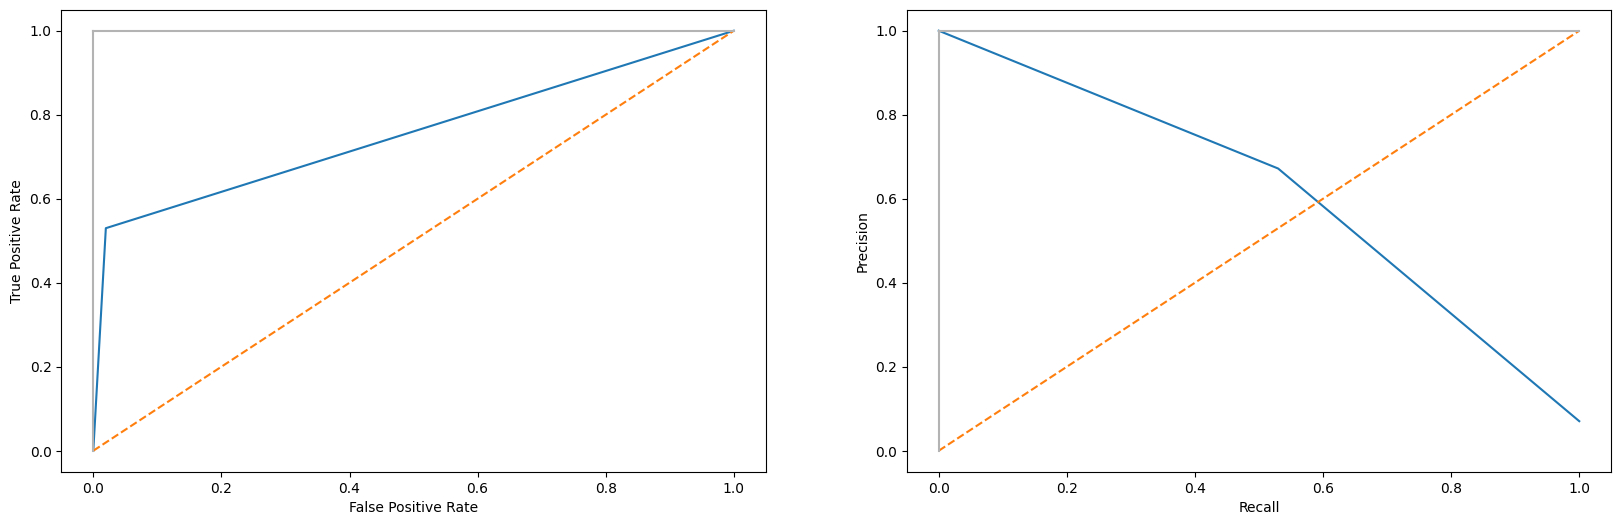

In [22]:
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_pred_test)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

**Observation:**

- We can **observe** a slight difference between **ROC-AUC CURVE** and **Precision-Recall Curve**.

<a name = Section74></a>

## **7.4 Random Forest with RandomizedSearchCV**


Applying __RandomizedsearchCV__ method for __exhaustive search over specified parameter values__ of estimator.<br/>
To know more about the different parameters in random forest classifier, refer the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). <br/>
Below we will apply gridsearch over the following parameters:
- criterion 
- max_depth 
- n_estimators
- min_samples_split
- min_samples_leaf

You can change other parameters also and compare the impact of it via calculating __accuracy score & confusion matrix__

In [23]:
# parameters for RandomearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": [2,4,5],
              "min_samples_split": [2,4,7,9],
              "min_samples_leaf": [3,5,7,11],
              "bootstrap": [True, False],
              "n_estimators": [12,90,100,300,700],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [24]:
random_search.fit(X_train, y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...andom_state=0)
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, ...], 'max_features': ['sqrt', 'log2', ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",50
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... v

In [25]:
y_pred_test1 = random_search.predict(X_test)

<a name = Section75></a>

## **7.5 Random Forest with RandomSearchCV Model Evaluation**

### Checking Accuracy

In [26]:
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data is: 0.9508311461067367


### Checking Precision Score

In [27]:
precision_score(y_test,y_pred_test1)

0.6908517350157729

### Checking Recall Score

In [28]:
recall_score(y_test,y_pred_test1)

0.5447761194029851

### Checking F1-Score


In [29]:
f1_score(y_test,y_pred_test1)

0.6091794158553546

### Checking ROC-AUC Curve and Precision-Recall Curve

Text(0.5, 0, 'Recall')

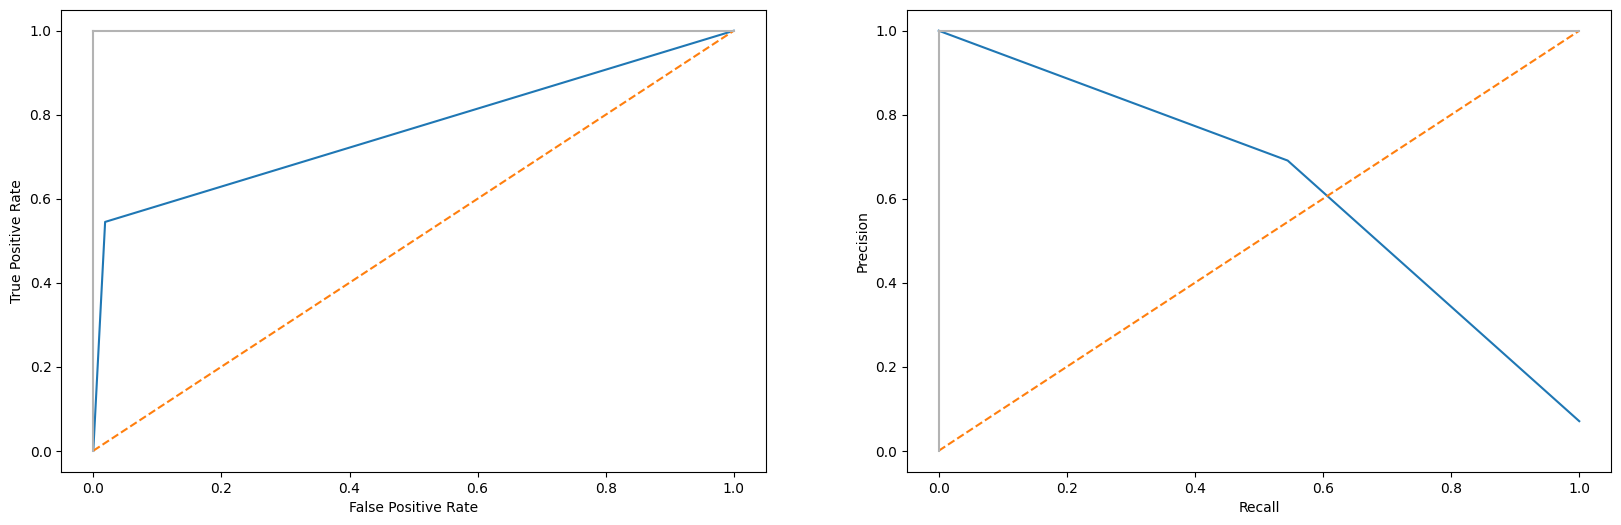

In [30]:
fpr_log,tpr_log,thres_log = roc_curve(y_test,y_pred_test1)
log_precision, log_recall, log_thres = precision_recall_curve(y_test, y_pred_test1)


fig, ax = plt.subplots(1,2,figsize=(20,6))
ax[0].plot(fpr_log,tpr_log)
ax[0].plot([0, 1], ls="--")
ax[0].plot([0, 0], [1, 0] , c=".7")
ax[0].plot([1, 1] , c=".7")
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')


ax[1].plot(log_recall,log_precision)
ax[1].plot([0, 1], ls="--")
ax[1].plot([0, 0], [1, 0] , c=".7")
ax[1].plot([1, 1] , c=".7")
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

<a name = Section7></a>

---
# **7. Choosing Better Model Based On Prediction**
---

In [31]:
precision_dict = {'Baseline Model':precision_score(y_test, y_pred_test),
                  'Tuned Model':precision_score(y_test, y_pred_test1)}

In [32]:
precision = pd.DataFrame(precision_dict, index=['Scores'])

In [33]:
precision

,Baseline Model,Tuned Model
Scores,0.67192,0.69085


- We have **compared the performance** of the two models using **various model evaluation techinques**.

- Our **objective is to minimize False Positive** so that no innocent is convicted as guilty. Therefore, **among recall & precision scores, we will give more importance to precision score**.
  
  - **Precision score for model1 is: 0.67**

  - **Precision score for model2 is: 0.69**

* As **precision score of Tuned Model is greater** than that of Baseline Model, therefore, **Tuned Model** is preferable.

<a name = Section8></a>

---
# **8. Conclusion**
---

- We **studied in breifly about the data**, its **characteristics** and its **distribution**.

- We **investigated in depth about the features** which to **retain** and which to **discard**.

- We **performed model training**.

- We **observed metrics for our prediction**.

- This **model** now can **help us** in **identifying** the criminal.